<center><h1>Multi-Level Line Encoding</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bits = "10110010"

In [3]:
bits_list = [int(char) for char in bits]
print(bits_list)

[1, 0, 1, 1, 0, 0, 1, 0]


<b>Input

In [4]:
def plot_signal_input(bits_list):
    time = range(len(bits_list)+1)
    signal = bits_list + [bits_list[-1]]
    plt.step(time,signal,where="post")
    plt.xticks(np.arange(len(bits) + 1))
    plt.yticks([0, 1])
    plt.grid(True)
    plt.title(f"Input for:  {bits}")
    plt.xlabel("Time")
    plt.ylabel("Voltage Level")
    plt.savefig("MLT-3_input_plot.png", dpi=300, bbox_inches='tight')
    plt.show()

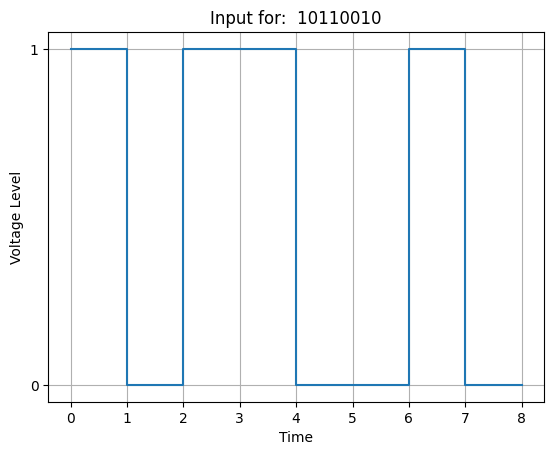

In [5]:
plot_signal_input(bits_list)

<b>Encoding

In [6]:
def mlt_encode(bits):
    pattern = [0,1,0,-1]
    prev = 0
    curr = 0
    signal = []
    for i in bits:
        if i == '1':
            prev = (prev + 1) % 4
            curr = pattern[prev]
        signal.append(curr)
    return signal
        

In [7]:
mlt_encoded_signal = mlt_encode(bits)

In [9]:
print(f"Multi Level Line Encoded Signal : {mlt_encoded_signal}")

Multi Level Line Encoded Signal : [1, 1, 0, -1, -1, -1, 0, 0]


In [10]:
def plot_signal(mlt_encoded_signal):
    time = range(len(mlt_encoded_signal)+1)
    signal = mlt_encoded_signal + [mlt_encoded_signal[-1]]
    plt.step(time,signal,where="post")
    plt.xticks(np.arange(len(bits) + 1))
    plt.yticks([-1, 0, 1])
    plt.grid(True)
    plt.title(f"Multi Level Encoding for: {bits}")
    plt.xlabel("Time")
    plt.ylabel("Voltage Level")
    plt.savefig("MLT-3_Encoding.png", dpi=300, bbox_inches='tight')
    plt.show()

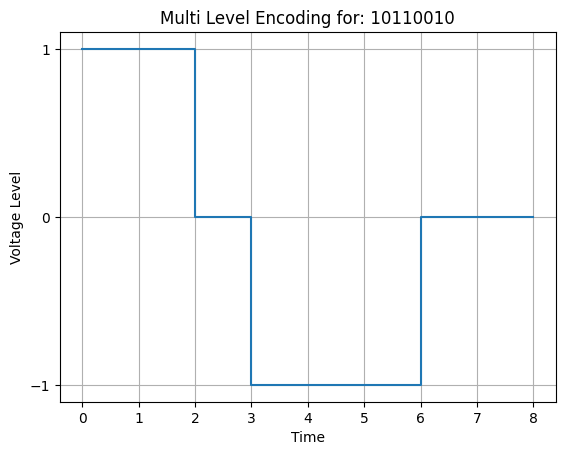

In [11]:
plot_signal(mlt_encoded_signal)

<b>Decoding

In [12]:
def mlt_decode(mlt_encoded_signal):
    decoded_signal = ''
    for i in range(len(mlt_encoded_signal)):
        if i == 0:
            if mlt_encoded_signal != 0:
                decoded_signal+='1'
            else:
                decoded_signal+='0'
        elif mlt_encoded_signal[i] != mlt_encoded_signal[i-1]:
            decoded_signal +='1'
        else:
            decoded_signal+='0'
    return decoded_signal

In [13]:
mlt_decoded_signal = mlt_decode(mlt_encoded_signal)

In [14]:
print(f"Multi Decoded Signal : {mlt_decoded_signal}")

Multi Decoded Signal : 10110010


In [15]:
decode_list = [int(char) for char in mlt_decoded_signal]
print(decode_list)

[1, 0, 1, 1, 0, 0, 1, 0]


In [16]:
def plot_signal_output(bits_list):
    time = range(len(bits_list)+1)
    signal = bits_list + [bits_list[-1]]
    plt.step(time,signal,where="post")
    plt.xticks(np.arange(len(bits) + 1))
    plt.yticks([0, 1])
    plt.grid(True)
    plt.title(f"Output for:  {mlt_decoded_signal}")
    plt.xlabel("Time")
    plt.ylabel("Voltage Level")
    plt.savefig("MLT-3_Decoding.png", dpi=300, bbox_inches='tight')
    plt.show()

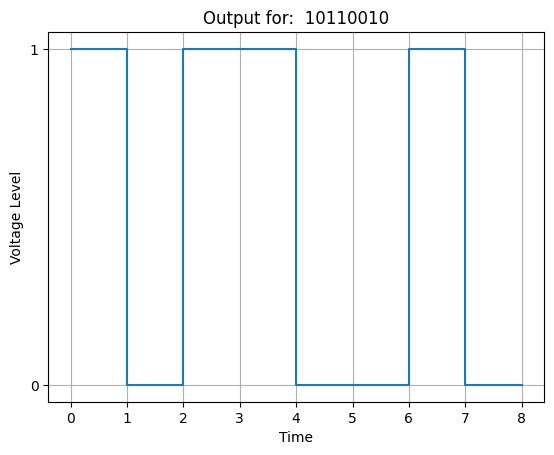

In [17]:
plot_signal_output(decode_list)